<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Optimization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nelder-Mead downhill simplex (amoeba method)


The Nelder-Mead method works by moving an N-D *simplex* downhill until it surrounds a minimum, then contracts until a specified threshold is reached.

A simplex is the simplest nD polygon. For 2D this is a triangle, for 3D a tetrahedron, etc.


The algorithm proceeds identifying the 'Hi' and 'Lo' points:

1.   Reflection: Move 'Hi' *through* the opposite face, such that the volume of the simplex remains constant.  
2.   Expansion: Move 'Hi' further to increase the simplex volume.
3.   Contraction: Move 'Hi' a fraction towards the opposite face.
4.   Shrinkage: Move all verticies towards 'Lo'.



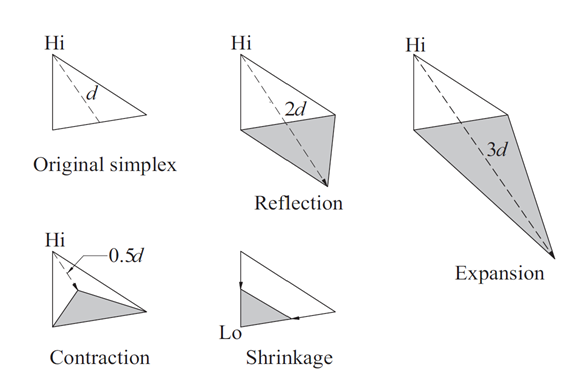

Algorithm:

```
Try reflection.
if new vertex ≤ old Lo: accept reflection
  Try expansion.
  if new vertex ≤ old Lo: accept expansion.
else:
  if new vertex > old Hi:
    Try contraction.
    if new vertex ≤ old Hi: accept contraction.
  else: use shrinkage.
```




It is sometimes known as the 'Amoeba method' since it appears to behave like a cell traversing an energy landscape.

It is much slower than Powell's method, but it is generally preferred for small dimensional problems due to its robustness.

#### Example: Nelder-Mead on the Rosenbrock function

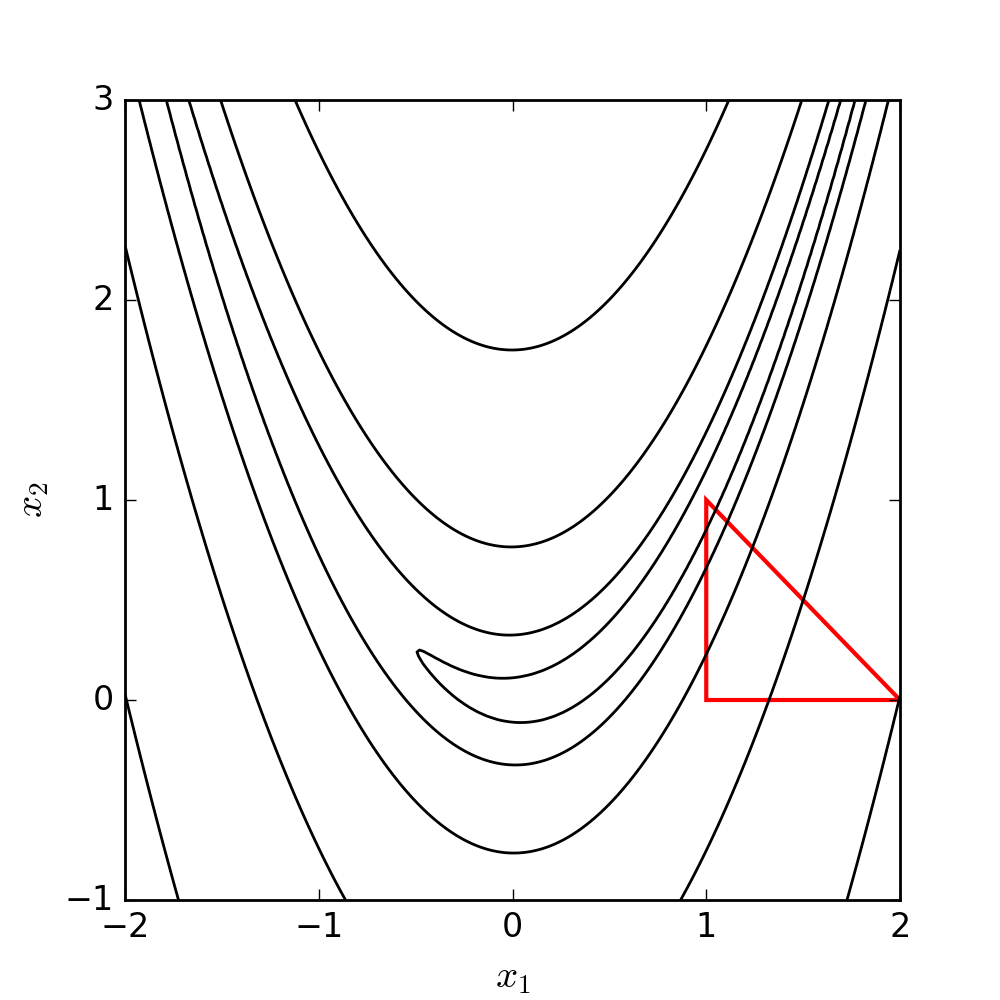

#### Example: Nelder-Mead on the Himmelblau function

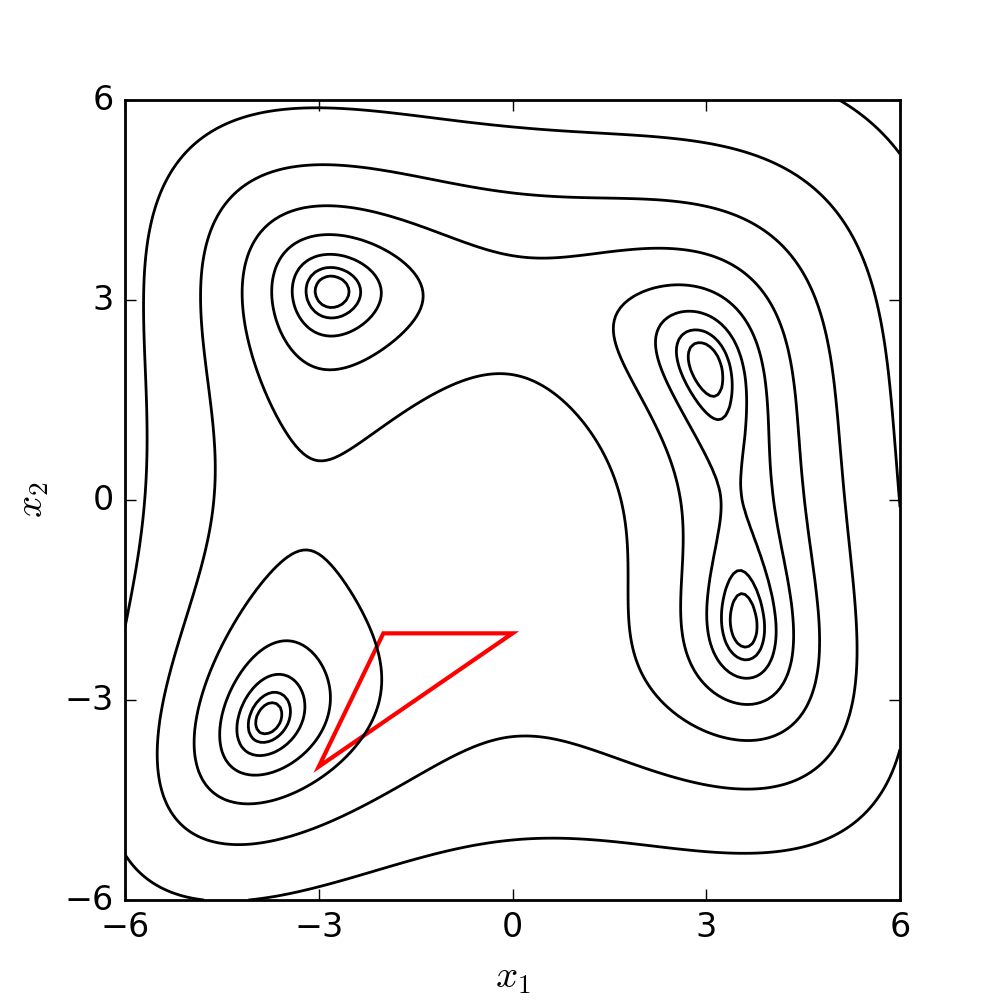

## Newton's optimization method

Newton's optimization routine aims to find the root of the gradient, which is the extremal. Since we are now focussed on scalar $f(\vec{x})$ the gradient is a vector and we will need the Hessian matrix $$H = \frac{\partial^2 f}{{\partial \vec{x}}^2}$$

The increment is now solved as:

$$
H \Delta \vec{x} = - \nabla f
$$

Noting that $H$ must be symmetric.

Netwon's optimization method has excellent convergence criteria but requires calculation of the Hessian which can be computationally expensive.

In [5]:
import numpy as np
from scipy.linalg import solve
import plotly.graph_objects as go

def newton_method(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=100):
  x = x0
  print(x)
  guesses = [x]
  for _ in range(max_iter):
    grad = grad_f(x)
    hess = hessian_f(x)

    # ~~ What goes here?

    ###
    delta_x = solve(hess, -grad, assume_a = 'sym')
    ###
    x = x + delta_x
    guesses.append(x)
    print(x)
    if np.linalg.norm(grad) < tol:
      break

  # Create a surface plot of the function
  x = np.linspace(-2, 2, 100)
  y = np.linspace(-2, 2, 100)
  X, Y = np.meshgrid(x, y)
  Z = f([X, Y])

  fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

  # Add markers for each guess
  for guess in guesses:
    fig.add_trace(go.Scatter3d(
        x=[guess[0]],
        y=[guess[1]],
        z=[f(guess)],
        mode='markers',
        marker=dict(
            size=5,
            color='red'
        )
    ))

  fig.update_layout(
      title='Newton\'s Method Optimization',
      scene=dict(
          xaxis_title='x',
          yaxis_title='y',
          zaxis_title='f(x,y)'
      )
  )
  fig.show()

#### Example: Minimize $x^4 + y^4$

In [6]:

def f(x):
  return x[0]**4 + 2*x[1]**4

def grad_f(x):
  return np.array([4*x[0]**3, 8*x[1]**3])

def hessian_f(x):
  return np.array([[12*x[0]**2, 0], [0, 24*x[1]**2]])

# Initial guess
x0 = np.array([1.5, 2])

# Perform Newton's method
newton_method(f, grad_f, hessian_f, x0)



[1.5 2. ]
[1.         1.33333333]
[0.66666667 0.88888889]
[0.44444444 0.59259259]
[0.2962963  0.39506173]
[0.19753086 0.26337449]
[0.13168724 0.17558299]
[0.0877915  0.11705533]
[0.05852766 0.07803688]
[0.03901844 0.05202459]
[0.02601229 0.03468306]
[0.01734153 0.02312204]
[0.01156102 0.01541469]
[0.00770735 0.01027646]
[0.00513823 0.00685097]
[0.00342549 0.00456732]
[0.00228366 0.00304488]


#### Example Minimize $x^2+y^2$

In [7]:
import numpy as np
from scipy.linalg import solve
import plotly.graph_objects as go

def f(x):
  return x[0]**2 + x[1]**2

def grad_f(x):
  return np.array([2*x[0], 2*x[1]])

def hessian_f(x):
  return np.array([[2, 0], [0, 2]])

# Initial guess
x0 = np.array([1.5, 1.5])

# Perform Newton's method
newton_method(f, grad_f, hessian_f, x0)



[1.5 1.5]
[0. 0.]
[0. 0.]


Why does this converge so fast?

#### Example: $x^2 - 6 x y +y^2$

In [8]:
def f(x):
  return x[0]**2 + x[1]**2 - 6*x[0]*x[1]

def grad_f(x):
  return np.array([2*x[0] - 6*x[1], 2*x[1] - 6*x[0]])

def hessian_f(x):
  return np.array([[2, -6], [-6, 2]])

# Initial guess
x0 = np.array([1.5, 2.])

# Perform Newton's method
newton_method(f, grad_f, hessian_f, x0)

[1.5 2. ]
[-2.22044605e-16  0.00000000e+00]
[0. 0.]


Yeehaw Giddyup!

# Indefiniate systems

The quadratic $x^2 - 6 x y +y^2$ is an example of a problem with an *indefinite* matrix. Such functions are neither convex nor concave, and the *extremal point* is neither a minimum nor a maximum, but a *saddle point* (as visualized).

Saddle point problems are an important subclass of optimization as we'll see when we deal with constraints.  

Newton's method, and generally optimizers that employ gradients, typically can identify saddle points, but direct methods often fail unless one modifies the objective function (e.g.: Minimize $f^2$)

## Eigenvalues / functions

The fact that $f(x,y) = x^2 - 6 x y +y^2$ is indefinite may come as a surprise considering the quadratics along the axes, $f(x,0) = x^2$ and $f(0,y) = y^2$ are obviously positive definite.

The key is to realize that we could rotate the coordinate system by $45^0$ (which obviously wouldn't change the extremal), and write the same function as $f(x',y') = 8 {x'}^2 - 4 {y'}^2$ from which the saddle point is clear.





*But how would you know that?*

The $x',y'$ coordiate system is *special* in that its Hessian doesn't have diagonal terms. They are the *eigenvectors* of the Hessian, and the $8$ and $-4$ are the *eigenvalues*. With this in mind, definiteness is defined:

| Definiteness | Eigenvalues |
|---|---|
| Positive Definite | All eigenvalues are positive. |
| Negative Definite | All eigenvalues are negative. |
| Indefinite | Eigenvalues are positive and negative. |
| Positive Semi-Definite | All eigenvalues are non-negative (positive or zero). |
| Negative Semi-Definite | All eigenvalues are non-positive (negative or zero). |

In [9]:
# prompt: what are the eigen functions and values of x^2 - 6xy + y^2

import numpy as np

def hessian_f(x):
  return np.array([[2, -6], [-6, 2]])

hessian = hessian_f([0,0])

eigenvalues, eigenvectors = np.linalg.eig(hessian)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [ 8. -4.]
Eigenvectors: [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Newton's optimization routine is highly sensative to initial guesses. Furthermore, the calculation and inversion of the Hessian can be computationally expensive and we don't necessarily *trust* that it will give us a good result. We will return to it later in its more common form...

# Gradient decent methods

If you have information about the gradient (exactly or approximately), moving down the gradient is an intuitive approach to reach the minimum. While fairly fool-proof, as we saw that the steepest decent can lead to *zig-zagging* which motivated constructing orthogonal / conjugate directions which limit their interference with each other.




Recal each step is incremented:
$$\vec{x}^{i+1} = \vec{x}^i+a \vec{p}$$
where $a$ is the step length and $\vec{p}$ is the step direction.

The steepest decent, $p=-\nabla f$ maximizes the change in $f$ *in the immediate neighbourhood*, but a different direciton may permit longer step lengths. In general:

$$f(\vec{x}^{1+1})-f(\vec{x}^i) \le -a \|\nabla{f}\| \|p\| \bigg[cos(\theta) -\max_{t ∈ [0,1]} \frac{\|\nabla f(\vec{x}^i-t a \vec{p}) - \nabla f(\vec{x}) \|}{\|\nabla f(\vec{x})\|}\bigg]$$


The second term assesses the rate of change of $\nabla f$ and involves new quantities, so an exact calculation is typically avoided. Approximations to this term (or alternative algorithmic tools) give rise to different methods.

## Stoichastic gradient decent

Machine learning training involves optimizing a model by finding an appropriate set of parameters. The parameter space can be very high dimensional, and the resulting function can be highly complex. In this case the gradient may be approximated by randomly sampling the change in subsets of parameters. The step length $a$ is renamed the *learning rate*.  

# Trust region methods

Trust region method define a region around the current guess in which the actual function is *trusted* to behave like some model function (to within some tolerance). They are designed to improve robustness for complex surfaces, including indefinate and ill-conditioned surfaces.

They are somewhat *dual* to line search:
* Line search: Choose a direction and search along the line for the next step.
* Trust region: Choose a step length (or limit) and then choose the direction.


The model function can be linear (based on the gradient at the current point) or quadratic (based on the gradient and the Hessian).

Algorithms differ by the criteria for updating the trust region, selection of the next guess, and what to do if the trust region fails.

(E.g.: If the new step deviates too far from the model, does one shrink the trust region for the *next step* or reject the current step and recalculat?).

#Comparison of optimization methods discussed *so far*

| **Category**       | **Optimization Technique**                | **Method Name**       |
|--------------------|-------------------------------------------|-----------------------|
| **Line Search**    | Broyden-Fletcher-Goldfarb-Shanno (BFGS)   | `BFGS`                |
|                    | Newton-Conjugate-Gradient                 | `Newton-CG`           |
|                    | Limited-memory BFGS                       | `L-BFGS-B`            |
|                    | Sequential Least Squares Programming      | `SLSQP`               |
| **Trust Region**   | Trust-Region Newton-Conjugate-Gradient    | `trust-ncg`           |
|                    | Trust-Region Truncated Generalized Lanczos| `trust-krylov`        |
|                    | Trust-Region Nearly Exact                 | `trust-exact`         |
| **Direct**         | Nelder-Mead Simplex                       | `Nelder-Mead`         |
|                    | Powell's Method                           | `Powell`              |
| **Gradient Descent**| Conjugate Gradient                       | `CG`                  |


#### Example - Compare optimizers

In [10]:
def f(x):
       return (((x[0]**2+x[1]-11)**2) + (((x[0]+x[1]**2-7)**2)))

def grad_f(x):
  """Gradient of the function f."""
  x1, x2 = x
  df_dx1 = 4 * (x1**2 + x2 - 11) * x1 + 2 * (x1 + x2**2 - 7)
  df_dx2 = 2 * (x1**2 + x2 - 11) + 4 * (x1 + x2**2 - 7) * x2
  return np.array([df_dx1, df_dx2])

def hess_f(x):
  """Hessian of the function f."""
  x1, x2 = x
  d2f_dx1dx1 = 12 * x1**2 + 4 * x2 - 44 + 2
  d2f_dx1dx2 = 4 * x1 + 4 * x2
  d2f_dx2dx1 = 4 * x1 + 4 * x2
  d2f_dx2dx2 = 2 + 4 * x1 + 12 * x2**2 - 28
  return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])


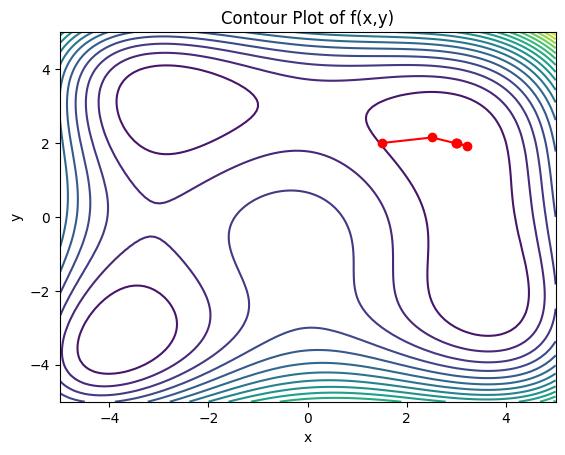

In [18]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the function values for each point on the grid
Z = f([X, Y])

# Initial guess
x0 = np.array([1.5, 2])

guesses = [x0]
def callback(xk):
  guesses.append(xk)

# BFGS
# trust-ncg
# Newton-CG
# Nelder-Mead
# CG
# trust-exact
result = minimize(f, x0, method='trust-exact', jac=grad_f, hess = hess_f, callback=callback)

# Create a contour plot
plt.contour(X, Y, Z, levels=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x,y)')

# Plot the path of the guesses
x_guesses = [guess[0] for guess in guesses]
y_guesses = [guess[1] for guess in guesses]
plt.plot(x_guesses, y_guesses, marker='o', linestyle='-', color='red')

plt.show()